In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv("../data/Merged_Statistics_and_lifestyle.csv") #base de datos ya fusionada

In [18]:
df.head() 

,User ID,Age,Gender,Sleep Quality,Bedtime,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage,Occupation,Sleep Duration,Stress Level,BMI Category,Blood Pressure,Heart Rate,Sleep Disorder
0,1,25,f,8,23:00,8000,2500,medium,healthy,no,no,Software Engineer,6.1,6,Overweight,126/83,77,NaN
1,2,34,m,7,00:30,5000,2200,low,unhealthy,yes,yes,Doctor,6.2,8,Normal,125/80,75,NaN
2,3,29,f,9,22:45,9000,2700,high,healthy,no,no,Doctor,6.2,8,Normal,125/80,75,NaN
3,4,41,m,5,01:00,4000,2100,low,unhealthy,yes,no,Sales Representative,5.9,8,Obese,140/90,85,Sleep Apnea
4,5,22,f,8,23:30,10000,2800,high,medium,no,no,Sales Representative,5.9,8,Obese,140/90,85,Sleep Apnea


**Revisión de datos (nulos y duplicado)**

In [ ]:
print(df.info())
print(df.isnull().sum())

duplicated = df.duplicated(subset=["User ID"])
totalDuplicated = duplicated.sum()
print(f"Total de valores duplicados: {totalDuplicated}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   User ID                  100 non-null    int64  
 1   Age                      100 non-null    int64  
 2   Gender                   100 non-null    object 
 3   Sleep Quality            100 non-null    int64  
 4   Bedtime                  100 non-null    object 
 5   Daily Steps              100 non-null    int64  
 6   Calories Burned          100 non-null    int64  
 7   Physical Activity Level  100 non-null    object 
 8   Dietary Habits           100 non-null    object 
 9   Sleep Disorders          100 non-null    object 
 10  Medication Usage         100 non-null    object 
 11  Occupation               100 non-null    object 
 12  Sleep Duration           100 non-null    float64
 13  Stress Level             100 non-null    int64  
 14  BMI Category             10

**Limpieza de datos (normalización, eliminación de duplicados, identificación de outliers)**

In [21]:
#Unificar categorías
df["Sleep Quality"] = df["Sleep Quality"].astype(str).str.capitalize()

#Normalización
df["Sleep Quality"] = df["Sleep Quality"].astype(str).str.capitalize()
df["Gender"] = df["Gender"].astype(str).str.upper()
df["User ID"] = df["User ID"].astype("string")
df["Occupation"] = df["Occupation"].str.strip()

#conversión a valores numéricos
df["Sleep Duration"] = pd.to_numeric(df["Sleep Duration"], errors="coerce")
df["Sleep Duration"] = pd.to_numeric(df["Sleep Duration"], errors="coerce")
df["Daily Steps"] = pd.to_numeric(df["Daily Steps"], errors="coerce")

In [ ]:
#Limpieza de Blood Pressure (Separar columnas en sistólica y diastólica)
if "Blood Pressure" in df.columns:
    df[["BP_Systolic", "BP_Diastolic"]] = df["Blood Pressure"].str.split("/", expand=True)
    df["BP_Systolic"] = pd.to_numeric(df["BP_Systolic"], errors="coerce")
    df["BP_Diastolic"] = pd.to_numeric(df["BP_Diastolic"], errors="coerce")
    df = df.drop(columns=["Blood Pressure"])

In [ ]:
#Eliminar duplicados
df = df.drop_duplicates()

#Outliers
def identifyOutliers(column: pd.Series):
    """
    Identifica y muestra los valores atípicos (outliers) de una columna numérica usando el método del rango intercuartílico (IQR).

    Parámetros:
    -----------
    column : pd.Series
        Serie de pandas que contiene los datos numéricos a analizar.

    Salidas:
    --------
    Imprime el número de outliers encontrados y una lista de los valores atípicos.
    """
    #Calcular cuartiles
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)

    #Rango intercuartílico
    ric = q3 - q1

    #Límites para detectar outliers
    high = q3 + 1.5 * ric
    low = q1 - 1.5 * ric

    #Filtrar outliers
    outliers = df[(column > high) | (column < low)]

    print(f"Número de outliers en {column.name}: {len(outliers)}")
    print(f"Outliers en {column.name}: {outliers[column.name].tolist()}")

#Aplicar outliers a todas las columnas numéricas
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        identifyOutliers(df[col])
        print(" ")

Número de outliers en Age: 0
Outliers en Age: []
 
Número de outliers en Daily Steps: 0
Outliers en Daily Steps: []
 
Número de outliers en Calories Burned: 0
Outliers en Calories Burned: []
 
Número de outliers en Sleep Duration: 0
Outliers en Sleep Duration: []
 
Número de outliers en Stress Level: 0
Outliers en Stress Level: []
 
Número de outliers en Heart Rate: 20
Outliers en Heart Rate: [77, 85, 85, 85, 82, 80, 80, 78, 78, 76, 76, 81, 81, 65, 65, 65, 65, 65, 65, 84]
 
Número de outliers en BP_Systolic: 5
Outliers en BP_Systolic: [140, 140, 140, 140, 135]
 
Número de outliers en BP_Diastolic: 25
Outliers en BP_Diastolic: [83, 90, 90, 90, 90, 87, 87, 86, 86, 76, 76, 85, 85, 86, 86, 84, 84, 75, 88, 75, 75, 75, 75, 75, 75]
 


**Guardar Dataframe limpio**

In [29]:
df.to_csv("dataset_Sueño_Limpio.csv", index=False)

**Análisis Descriptivo General**

In [37]:
 df = pd.read_csv("dataset_Sueño_Limpio.csv")
 df.describe() #estadísticas descriptivas: promedio, mediana, desviación estándar, etc.

,User ID,Age,Sleep Quality,Daily Steps,Calories Burned,Sleep Duration,Stress Level,Heart Rate,BP_Systolic,BP_Diastolic
count,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,36.010000,7.000000,6830.000000,2421.00000,6.871000,6.420000,71.610000,123.240000,80.640000
std,29.011492,8.454865,1.734964,2498.706736,281.06759,0.766903,1.485145,4.240009,5.327876,3.118922
min,1.000000,22.000000,4.000000,3000.000000,2000.00000,5.800000,3.000000,65.000000,115.000000,75.000000
25%,25.750000,28.750000,5.750000,4750.000000,2175.00000,6.100000,6.000000,70.000000,120.000000,80.000000
50%,50.500000,35.000000,7.500000,6750.000000,2400.00000,7.100000,6.000000,70.000000,120.000000,80.000000
75%,75.250000,44.000000,8.250000,9000.000000,2700.00000,7.700000,8.000000,72.000000,125.000000,80.000000
max,100.000000,50.000000,9.000000,11000.000000,2900.00000,7.900000,8.000000,85.000000,140.000000,90.000000


In [38]:
# Promedio de horas de sueño
promedio_sueño = df["Sleep Duration"].mean()
print("Promedio de horas de sueño:", promedio_sueño)

# Distribución por género
print(df.groupby("Gender")["Sleep Duration"].mean())

Promedio de horas de sueño: 6.871000000000001
Gender
F    6.852
M    6.890
Name: Sleep Duration, dtype: float64


**Gráficas**

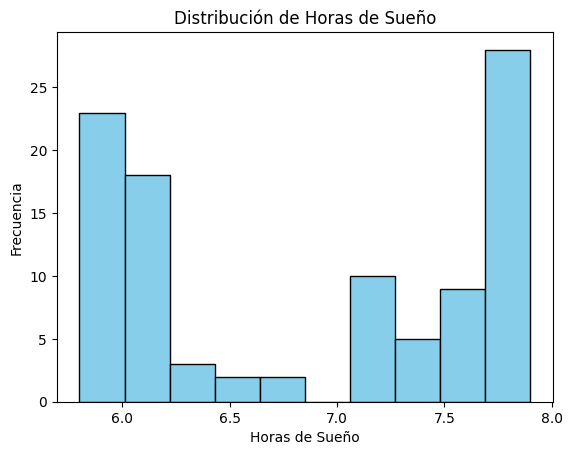

In [39]:
#Histograma de horas de sueño
plt.hist(df["Sleep Duration"], bins=10, color="skyblue", edgecolor="black")
plt.title("Distribución de Horas de Sueño")
plt.xlabel("Horas de Sueño")
plt.ylabel("Frecuencia")
plt.show()

Utilizamos un histograma ya que es un gráfico que divide los datos numéricos continuos en intervalos y muestra cuántos valores caen en cada intervalo. 
Es ideal para variables continuas como las horas de sueño, porque permite visualizar la distribución de los datos, detectar picos, concentraciones o outliers, y entender patrones generales en los valores sin enfocarse en cada dato individual.

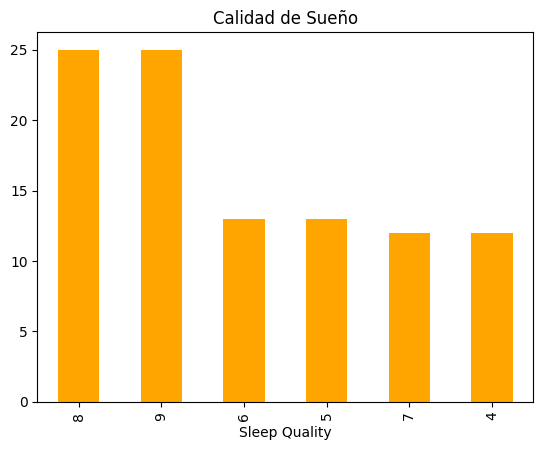

In [40]:
#Gráfico de barras de calidad de sueño
df["Sleep Quality"].value_counts().plot(kind="bar", color="orange")
plt.title("Calidad de Sueño")
plt.show()

Utilizamos un gráfico de barras ya que nos permite representar categorías discretas mediante barras cuya altura indica la frecuencia de cada categoría. 
Es perfecto para variables categóricas como la calidad del sueño, porque permite comparar fácilmente la cantidad de observaciones en cada categoría y comunicar los resultados de manera clara, algo que un histograma no haría bien con datos no numéricos.

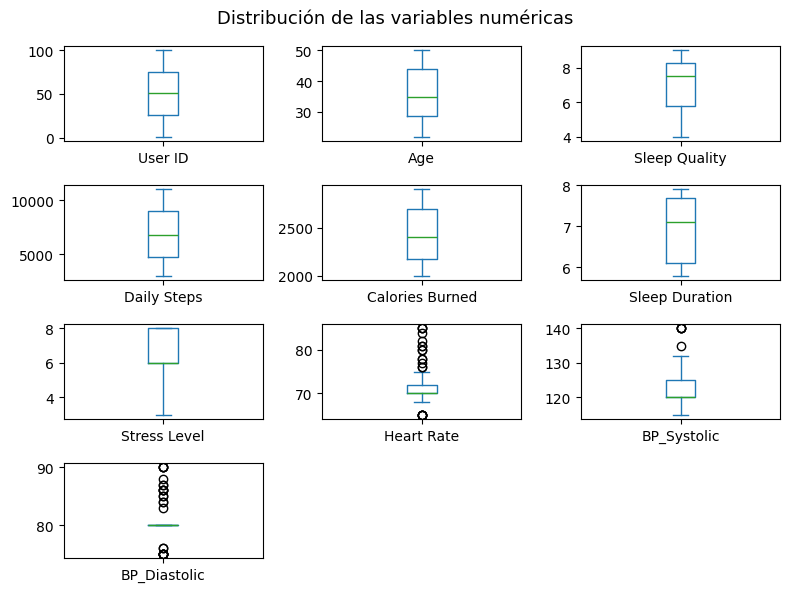

In [41]:
df.plot(kind='box', subplots=True, layout=(4, 3), figsize=(8, 6), sharex=False, sharey=False)
plt.suptitle("Distribución de las variables numéricas", fontsize=13)
plt.tight_layout()
plt.show()

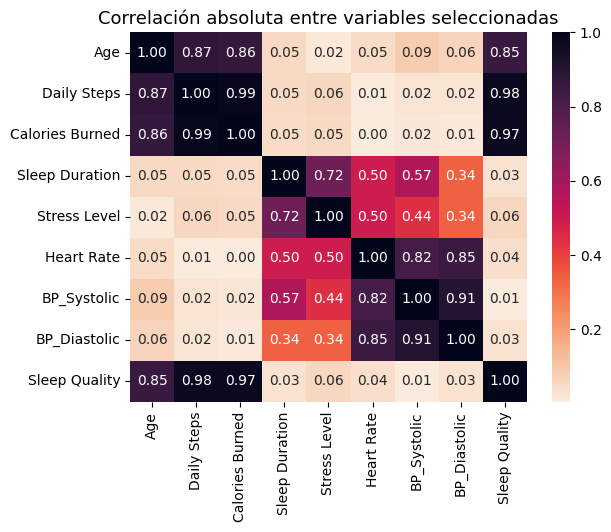

In [42]:
sns.heatmap(abs(df.iloc[:, [1, 5, 6, 12, 13, 15, 17, 18, 3]].corr()), cmap="rocket_r", annot=True, fmt=".2f")
plt.title("Correlación absoluta entre variables seleccionadas", fontsize=13)
plt.show()